TestSet3, [ссылка на датасет с разметкой](https://drive.google.com/file/d/1iCaP1renaEqRo5UMnEvhHrX-cD-DV9Q_/view)

In [2]:
!cd ../yolov5 && python3 detect.py --source /home/pi/abbyy-cv/task6/data/TestSet3/images --weights ./runs/train/exp3/weights/best.pt --hide-labels

detect: weights=['./runs/train/exp3/weights/best.pt'], source=/home/pi/abbyy-cv/task6/data/TestSet3/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.8.10 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
image 1/150 /home/pi/abbyy-cv/task6/data/TestSet3/images/0001_jpg.rf.259e090d6bf88aee121d7af1aeb461a4.jpg: 640x640 3 items, Done. (0.004s)
image 2/150 /home/pi/abbyy-cv/task6/data/TestSet3/images/0002_jpg.rf.bbd60ef7ab7267bb6c16d64257ccc235.jpg: 640x640 3 items, Done. (0.004s)
image 3/150 /home/pi/abbyy-cv/task6/data/

In [3]:
import cv2
import numpy as np
import os
os.makedirs('./images', exist_ok=True)

for fname in os.listdir('../data/TestSet3/images'):
    img_true = cv2.imread(f'../data/TestSet3/images/{fname}')
    img_predict = cv2.imread(f'../yolov5/runs/detect/exp4/{fname}')
    with open(f'../data/TestSet3/labels/{fname[:-4]}.txt') as f:
        labels = f.readlines()
        bbox_true = [list(map(float, label.split()[1:])) for label in labels] # x, y, width, height
        bbox_true = [
            (
                int(img_true.shape[1] * (x - w / 2)),
                int(img_true.shape[0] * (y - h / 2)),
                int(img_true.shape[1] * (x + w / 2)),
                int(img_true.shape[0] * (y + h / 2))
            )
            for x, y, w, h in bbox_true
        ]
        
    for bbox in bbox_true:
        cv2.rectangle(img_predict, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    cv2.imwrite(f'./images/{fname}', img_predict)

Красным цветом указаны предсказанные объекты, а зеленым объекты из разметки.

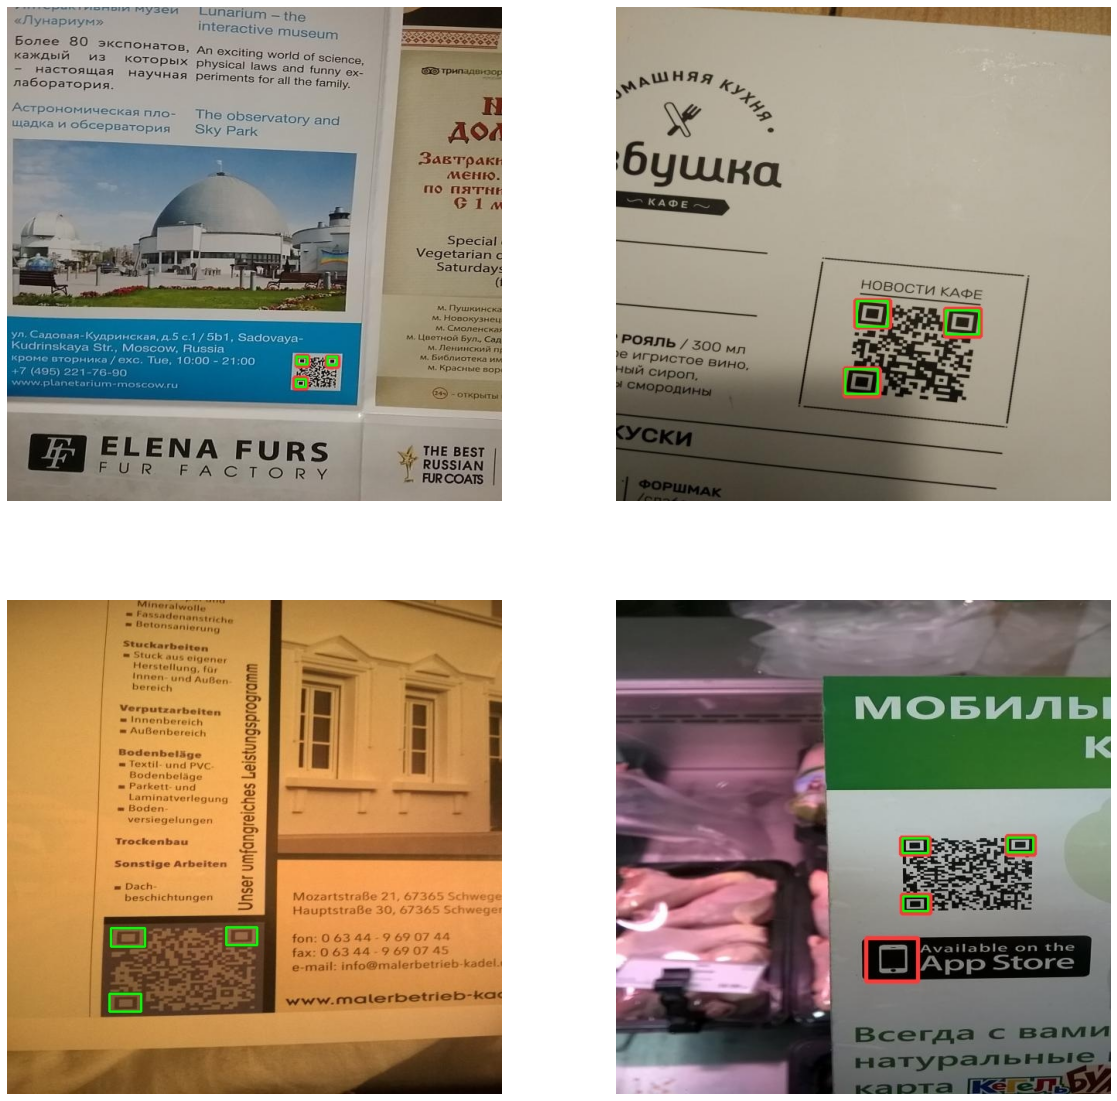

In [8]:
import matplotlib.pyplot as plt

to_cmp = [
    '0001_jpg.rf.259e090d6bf88aee121d7af1aeb461a4.jpg',
    '0009_jpg.rf.c41b5a6f05ee93ccb0a70d830e9367f3.jpg',
    '0065_jpg.rf.2e6e469e037b512b9b2586229cd2eff4.jpg',
    '0144_jpg.rf.80d6c4276a6d7c70750d04d4dd66472b.jpg'
]

plt.figure(figsize=(20, 20))
for i, img in enumerate(to_cmp):
    plt.subplot(2, 2, i + 1)
    img = plt.imread(f'./images/{img}')
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

В целом модель справляется неплохо, но на изображении 3 она не смогла распознать черный qr-код, а так же иногда происходят ложные детекции.

In [5]:
%%writefile -a ../yolov5/data/testset3.yaml
path: /home/pi/abbyy-cv/task6/data
train: #empty
val: TestSet3
test: #empty

nc: 1
names: 'Finder pattern'
    
download: # empty

Writing ../yolov5/data/testset3.yaml


In [6]:
!cd ../yolov5 && python3 val.py --weights ./runs/train/exp3/weights/best.pt --data testset3.yaml --img 640 --single-cls

val: data=/home/pi/abbyy-cv/task6/yolov5/data/testset3.yaml, weights=['./runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.8.10 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning '/home/pi/abbyy-cv/task6/data/TestSet3/labels' images and labels..
val: New cache created: /home/pi/abbyy-cv/task6/data/TestSet3/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        150        483      0.993      0.944      0.985      0.428
Speed: 0.1ms pre-process, 0.9ms inference, 0.8ms NMS per image at shape (32, 3, 640, 640)
Results saved 

Получили метрики на TestSet3: `Precision`: 0.993, `Recall`: 0.944, `mAP@.5`: 0.985, `mAP@`: 0.428